In [1]:
from helpers import *
from models import *
from models import lr_model_test
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Helper functions

In [2]:
def get_plot_data_lr(training_lr, testing_lr):
    df = pd.DataFrame(training_lr)
    df['K'] = kvalues
    df = df.set_index('K')
    df = df.stack(0).reset_index()
    df.columns = ['K', 'C', 'train_precision']
    df_test = pd.DataFrame(testing_lr)
    df_test['K'] = kvalues
    df_test = df_test.set_index('K')
    df_test = df_test.stack(0).reset_index()
    df_test.columns = ['K', 'C', 'test_precision']
    df['test_precision'] = df_test['test_precision']
    return df

def get_plot_data_tf_lr(training_tf_lr, testing_tf_lr):
    df2 = pd.DataFrame(training_tf_lr).stack(0).reset_index()
    s = df2.apply(lambda x: pd.Series(x[0]),axis=1).stack().reset_index(level=1, drop=True)
    s.name = 'train_precision'
    df2.columns = ['Iterations', 'Learning rate', 'values']
    df2 = df2.drop('values', axis=1)
    df2 = df2.join(s).reset_index(drop=True)
    multip = len(df2)//len(kvalues)
    df2['K'] = kvalues * multip
    testing = pd.DataFrame(testing_tf_lr).stack(0).reset_index()
    df2['test_precision'] = testing.apply(lambda x: pd.Series(x[0]),axis=1).stack().reset_index(level=[0,1], drop=True)
    return df2

# Hyperparameters

In [2]:
kvalues = [300, 400, 500, 600, 700]
cvalues = [0.1, 0.2, 0.4, 0.5, 0.8, 1, 5, 10]

learning_rates = [0.00001, 0.0005, 0.001, 0.01, 0.1]
iterations = [100, 150, 200, 300]

training_lr = {c:[] for c in cvalues}
testing_lr = {c:[] for c in cvalues}
training_tf_lr = {lr:{it:[] for it in iterations} for lr in learning_rates}
testing_tf_lr = {lr:{it:[] for it in iterations} for lr in learning_rates}
training_tf_lenet = {it:[] for it in iterations} 
testing_tf_lenet = {it:[] for it in iterations}
train_dir = './images/train'
test_dir = './images/test'

best_model_lr = None
best_model_lr_tf = None
best_model_lenet_tf = None
best_test_score_lr = 0
best_test_score_tf_lr = 0
best_test_score_tf_lenet = 0

###### Todo: implement verbose mode in the models so the notebook could be cleaner.

# Tune SKLearn LR Model

In [93]:
for k in kvalues:
    for i, c in enumerate(cvalues):
        if(i == 0):
            kmeans = None    
        else:
            kmeans = joblib.load('./models/aux/kmeans.sav')
        training_score = lr_model(k, c, train_dir, kmeans)
        testing_score = lr_model_test(test_dir)
        training_lr[c].append(training_score)
        testing_lr[c].append(testing_score)
        
        if(testing_score>best_test_score_lr):
            best_test_score_lr = testing_score
            best_model_lr = {'k': k, 'c': c}


Creating kmeans for feature detection.
Training precision: 0.920529801325 
Testing precision: 0.698198198198
Creating kmeans for feature detection.
Training precision: 0.94591611479 
Testing precision: 0.698198198198
Creating kmeans for feature detection.
Training precision: 0.96357615894 
Testing precision: 0.689189189189
Creating kmeans for feature detection.
Training precision: 0.966887417219 
Testing precision: 0.689189189189
Creating kmeans for feature detection.
Training precision: 0.971302428256 
Testing precision: 0.684684684685
Creating kmeans for feature detection.
Training precision: 0.974613686534 
Testing precision: 0.689189189189
Creating kmeans for feature detection.
Training precision: 0.988962472406 
Testing precision: 0.675675675676
Creating kmeans for feature detection.
Training precision: 0.988962472406 
Testing precision: 0.671171171171
Creating kmeans for feature detection.
Training precision: 0.950331125828 
Testing precision: 0.716216216216
Creating kmeans for f

# Tune TF Model

In [9]:
for k in kvalues:
    for i, lr in enumerate(learning_rates):
        for it in iterations:
            if(i == 0):
                kmeans = None    
            else:
                kmeans = joblib.load('./models/aux/kmeans_tf.sav')
            training_score = tf_lr_model(k, train_dir, learning_rate=lr, training_iteration=it, display_step=1000,kmeans = kmeans)
            testing_score = tf_lr_test(test_dir)
            training_tf_lr[lr][it].append(training_score)
            testing_tf_lr[lr][it].append(testing_score)

            if(testing_score>best_test_score_lr):
                best_test_score_lr = testing_score
                best_model_lr = {'k': k, 'lr': lr, 'it': it}


K value:  300
Lr value:  0.0005
It value:  100
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.108265902
Tuning completed!
Testing precision: 0.945916
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.689189
It value:  150
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.108221543
Tuning completed!
Testing precision: 0.959161
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.689189
It value:  200
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.108249027
Tuning completed!
Testing precision: 0.972406
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.684685
It value:  300
Creating kmeans for feature detecti

Iteration: 0001 cost= 0.031554593
Tuning completed!
Testing precision: 0.966887
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.644144
K value:  400
Lr value:  0.0005
It value:  100
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.107910838
Tuning completed!
Testing precision: 0.963576
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.707207
It value:  150
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.108123585
Tuning completed!
Testing precision: 0.974614
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.707207
It value:  200
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.108211121
Tuning completed

Iteration: 0001 cost= 0.029066539
Tuning completed!
Testing precision: 0.97351
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.662162
K value:  500
Lr value:  0.0005
It value:  100
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.108077904
Tuning completed!
Testing precision: 0.976821
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.711712
It value:  150
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.107707562
Tuning completed!
Testing precision: 0.983444
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.711712
It value:  200
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.107877683
Tuning completed!

Iteration: 0001 cost= 0.028665412
Tuning completed!
Testing precision: 0.974614
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.666667
K value:  600
Lr value:  0.0005
It value:  100
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.107809657
Tuning completed!
Testing precision: 0.983444
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.702703
It value:  150
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.107803998
Tuning completed!
Testing precision: 0.993378
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.707207
It value:  200
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.107893022
Tuning completed

Iteration: 0001 cost= 0.025222161
Tuning completed!
Testing precision: 0.980132
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.662162
K value:  700
Lr value:  0.0005
It value:  100
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.107810851
Tuning completed!
Testing precision: 0.98234
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.716216
It value:  150
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.107855487
Tuning completed!
Testing precision: 0.988962
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.711712
It value:  200
Creating kmeans for feature detection.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 cost= 0.107580365
Tuning completed!

Iteration: 0001 cost= 0.030517558
Tuning completed!
Testing precision: 0.970199
INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt
Testing precision: 0.675676


In [99]:
lr_data = get_plot_data_lr(training_lr, testing_lr)

# Training and Testing lines for each c and K values 

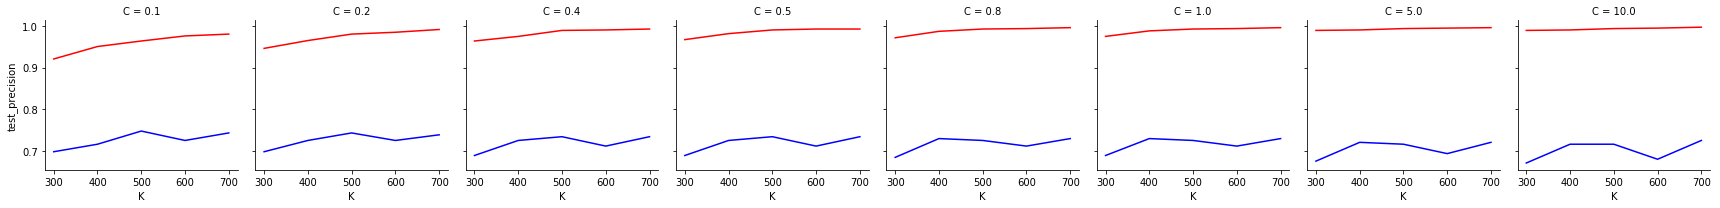

In [101]:
g = sns.FacetGrid(lr_data, col='C')
g.map(plt.plot, 'K', "train_precision", color="r")
g.map(plt.plot, 'K', "test_precision", color="b")
plt.show()

In [110]:
k, c, train_precision, test_precision = lr_data.iloc[tf_lr_data['test_precision'].idxmax()]
print('Best LR model: %s c value,  %s k value. %0.4f Training precision, %0.4f Testing precision.' % (c, k, train_precision, test_precision))

Best LR model: 1.0 c value,  600.0 k value. 0.9934 Training precision, 0.7117 Testing precision.


In [80]:
tf_lr_data = get_plot_data_tf_lr(training_tf_lr, testing_tf_lr)

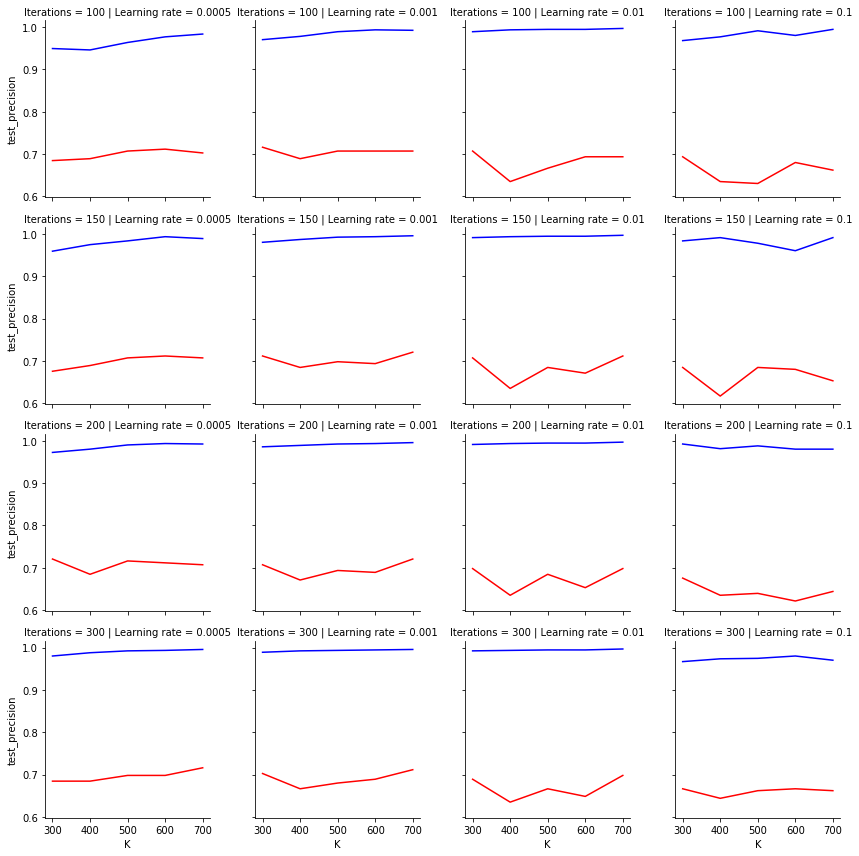

In [109]:
g = sns.FacetGrid(tf_lr_data, col='Learning rate', row='Iterations')
g.map(plt.plot, 'K', "train_precision", color="b")
g.map(plt.plot, 'K', "test_precision", color="r")
plt.show()

In [111]:
it, lr, train_precision, k, test_precision = tf_lr_data.iloc[tf_lr_data['test_precision'].idxmax()]
print('Best TF LR model: %s iterations, %s learning rate, %s k value. %0.4f Training precision, %0.4f Testing precision.' % (it, lr, k, train_precision, test_precision))

Best TF LR model: 150.0 iterations, 0.001 learning rate, 700.0 k value. 0.9956 Training precision, 0.7207 Testing precision.


# Tune LeNet-5 Model

In [6]:
imgs_train, labels_train, tf_img_names_train = get_images('./images/train', infer=False)
imgs_train, labels_train = transform_input(imgs_train, labels_train, infer=False)
#tf_lenet_model(imgs_train, labels_train, 'train', n_epochs=100)

In [7]:
imgs_test, labels_test, tf_img_names_test = get_images('./images/test', infer=False)
imgs_test, labels_test = transform_input(imgs_test, labels_test, infer=False)
#tf_lenet_model(imgs_test, labels_test, 'test')

In [15]:
for lr in learning_rates:
    print('Learning rate: ',lr)
    for epoch in iterations:
        print('# epochs: ' ,epoch)
        training_score = tf_lenet_model(imgs_train, labels_train, lr=lr, n_epochs=epoch, mode='train', verbose=False)
        testing_score = tf_lenet_model(imgs_test, labels_test, lr=lr, n_epochs=epoch, mode='test')
        training_tf_lenet[epoch].append(training_score)
        testing_tf_lenet[epoch].append(testing_score)

        if(testing_score>best_test_score_tf_lenet):
            best_test_score_tf_lenet = testing_score
            best_model_lenet_tf = {'lr': lr, 'epoch':epoch}

Learning rate:  1e-05
# epochs:  100
Training accuracy:  0.380412
INFO:tensorflow:Restoring parameters from ./models/model3/model3.ckpt
Testing accuracy:  0.358025
# epochs:  150
Training accuracy:  0.45567
INFO:tensorflow:Restoring parameters from ./models/model3/model3.ckpt
Testing accuracy:  0.423868
# epochs:  200
Training accuracy:  0.546392
INFO:tensorflow:Restoring parameters from ./models/model3/model3.ckpt
Testing accuracy:  0.526749
# epochs:  300


KeyboardInterrupt: 